<a href="https://colab.research.google.com/github/exponentialR/CNN/blob/main/SingleNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import drive
import sys
sys.path.append('/content/drive/MyDrive/CNN')
import imagetoarraypreprocessor as iap
import simplepreprocessor as sp
import simpledatasetloader as sdl
from singlenet import SingleNet
from tensorflow.keras.optimizers import SGD
from imutils import paths 
import matplotlib.pyplot as plt
import numpy as np
import argparse


In [ ]:
imagePaths = list(paths.list_images('/content/drive/MyDrive/CNN/animals'))
sp = sp.SimplePreprocessor(32, 32)
iap = iap.ImageToArrayPreprocessor()
sdl = sdl.SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [ ]:
print("[MESSAGE] compiling model...")
opt = SGD(lr=0.005)
model = SingleNet.modbuild(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[MESSAGE] compiling model...


In [ ]:
#train the network

print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=32, epochs=300, verbose=5)

[INFO] training network...
Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 7

In [ ]:
#Network Evaluation 
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["cat", "dog", "panda"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.63      0.61      0.62       262
         dog       0.56      0.56      0.56       249
       panda       0.82      0.84      0.83       239

    accuracy                           0.67       750
   macro avg       0.67      0.67      0.67       750
weighted avg       0.67      0.67      0.67       750



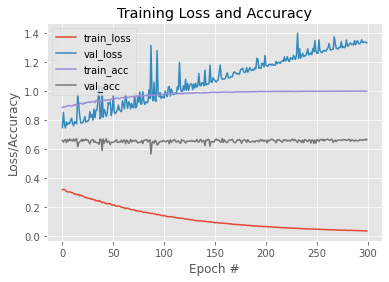

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 300), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 300), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 300), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 300), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()